# Imports


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from pgmpy.models import BayesianNetwork
import networkx as nx

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD

# Loading the data

In [3]:
dataset_path = './dataset/cancer patient data sets.csv'

dataset = pd.read_csv(dataset_path, index_col='index')
dataset.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


# Preprocessing
We are dropping the 'Patient Id' and mapping the categorical attribute 'Level'

In [4]:
dataset.drop('Patient Id', axis=1, inplace=True)
dataset['Level'] = OrdinalEncoder(categories=[['Low', 'Medium', 'High']]).fit_transform(dataset[['Level']])
dataset.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2.0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0


# Let's analyze the data

In [5]:
dataset.describe()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


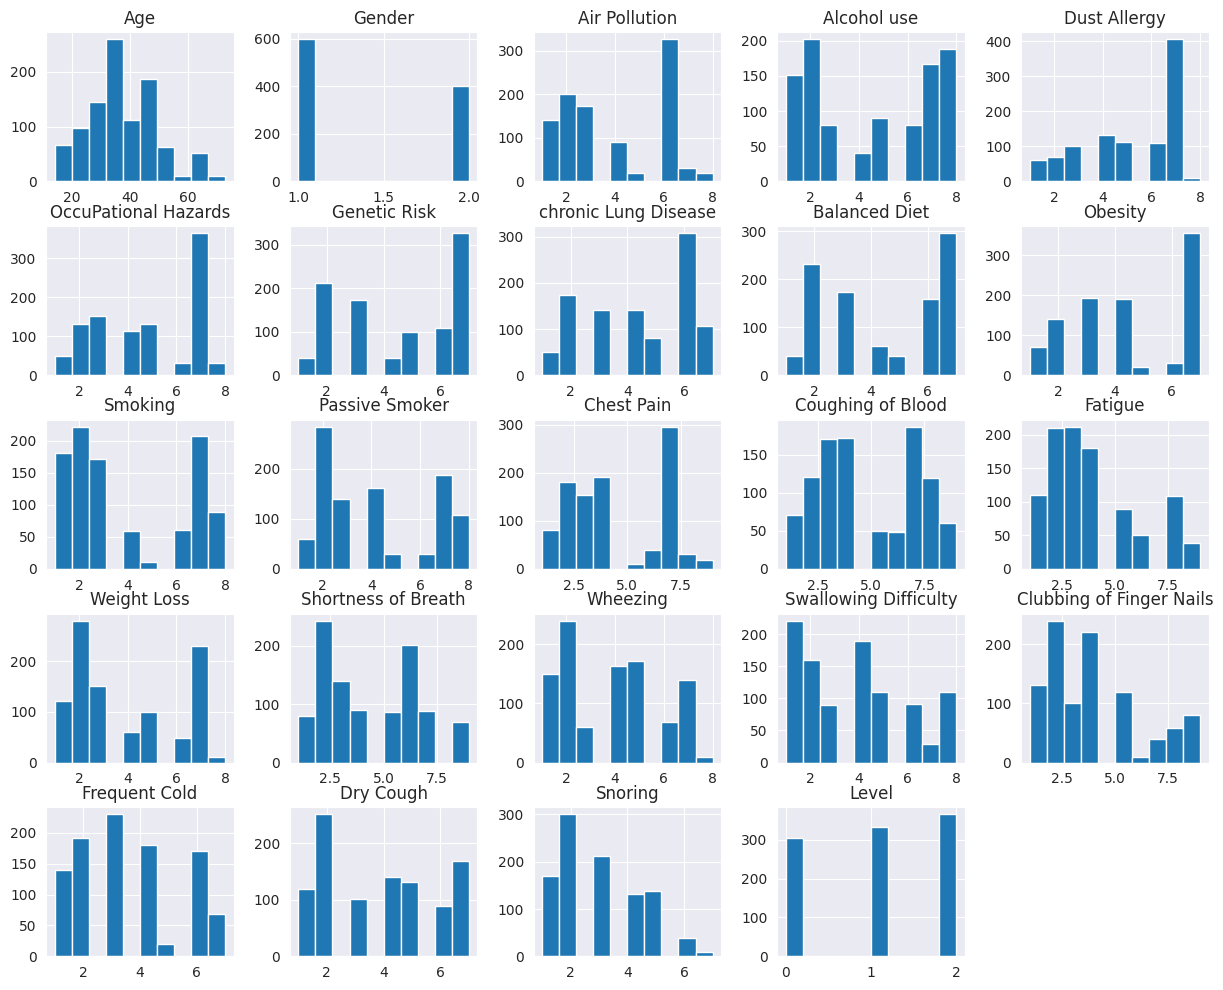

In [7]:
dataset.hist(figsize=(15,12));


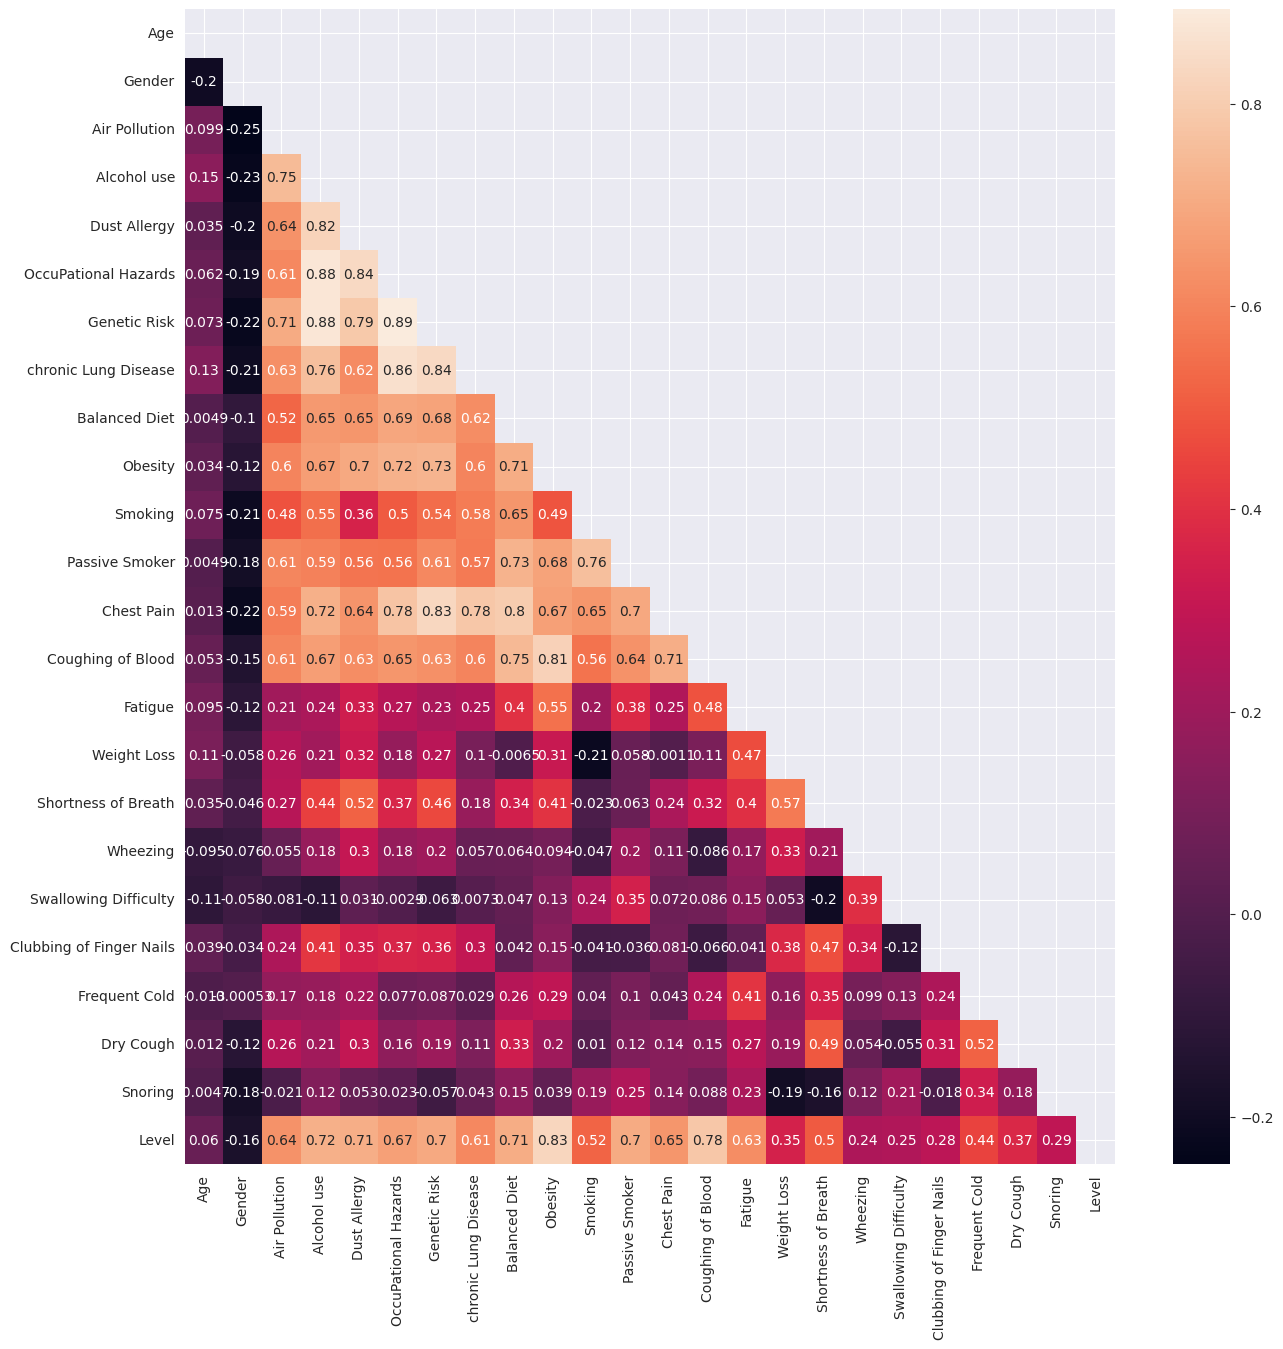

In [90]:
plt.figure(figsize=(15,15))
corr = dataset.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, mask=mask);

# Building the net

In [43]:
def get_node_size(label):
    fig, ax = plt.subplots(figsize=(3, 3))
    text = ax.text(0.5, 0.5, label, ha='center', va='center', fontsize=12)
    bbox = text.get_window_extent()
    width, height = bbox.width, bbox.height
    plt.close(fig)
    return 250 + max(width, height) * 40


def draw_the_net(nodes, net):

    graph = nx.DiGraph(net.edges())
    node_sizes = [get_node_size(label) for label in graph.nodes]

    pos = {}
    for i in range(len(graph.nodes)):
        if i < 2:
            pos[nodes[i]] = [i, 4]
        elif i < 10:
            pos[nodes[i]] = [(i - 5), 3]
        elif i < 14:
            pos[nodes[i]] = [(i - 10), 2]
        elif i < 21:
            pos[nodes[i]] = [(i - 15), 1]
        else:
            pos[nodes[i]] = [(i - 18), 0]

    plt.figure(figsize=(15,10))
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=node_sizes )
    nx.draw_networkx_edges(graph, pos, width=1.5, alpha=0.5, arrows=True, arrowstyle='->,head_width=0.1,head_length=2')
    nx.draw_networkx_labels(graph, pos, font_color='black', font_size=10)


    plt.show()

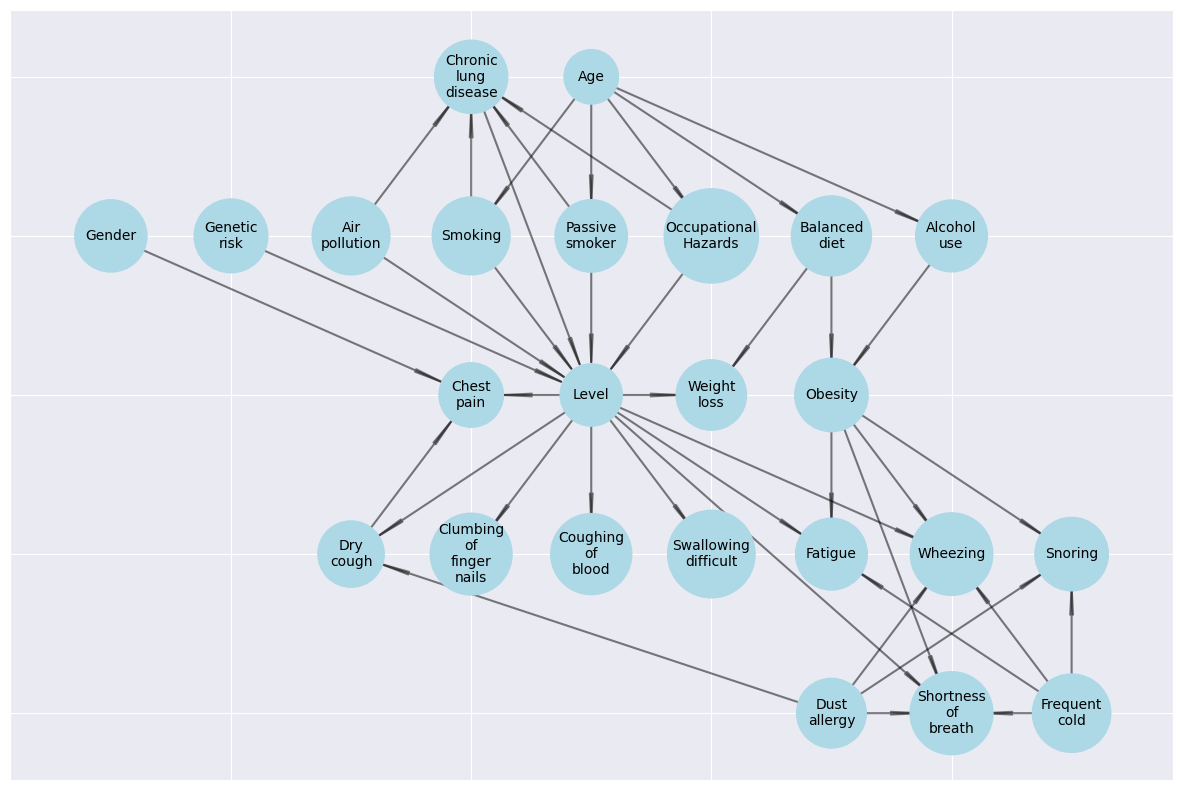

In [44]:
ordered_nodes = ['Chronic lung disease', 'Age', 'Gender', 'Genetic risk', 'Air pollution', 'Smoking', 'Passive smoker', 'Occupational Hazards', 'Balanced diet', 'Alcohol use', 'Chest pain', 'Level', 'Weight loss', 'Obesity', 'Dry cough', 'Clumbing of finger nails', 'Coughing of blood', 'Swallowing difficult', 'Fatigue', 'Wheezing', 'Snoring',  'Dust allergy', 'Shortness of breath','Frequent cold']


Arcs = [('Age', 'Smoking'),('Age', 'Passive smoker'), ('Age', 'Occupational Hazards'), ('Age', 'Balanced diet'), ('Age', 'Alcohol use'), ('Air pollution', 'Level'),  ('Chronic lung disease', 'Level'), ('Smoking', 'Level'), ('Passive smoker', 'Level'), ('Occupational Hazards', 'Level'), ('Genetic risk', 'Level'), ('Level', 'Chest pain'), ('Level', 'Dry cough'), ('Level', 'Clumbing of finger nails'), ('Level', 'Coughing of blood'), ('Level', 'Swallowing difficult'), ('Level', 'Fatigue'), ('Level', 'Wheezing'), ('Level', 'Shortness of breath'), ('Level', 'Weight loss'), ('Air pollution', 'Chronic lung disease'), ('Smoking', 'Chronic lung disease'), ('Passive smoker', 'Chronic lung disease'), ('Occupational Hazards', 'Chronic lung disease'), ('Balanced diet', 'Weight loss'), ('Balanced diet', 'Obesity'), ('Alcohol use' , 'Obesity'), ('Gender', 'Chest pain' ), ('Dry cough', 'Chest pain'),('Obesity', 'Fatigue'), ('Obesity', 'Wheezing'), ('Obesity', 'Shortness of breath'), ('Obesity', 'Snoring'), ('Dust allergy', 'Dry cough'), ('Dust allergy', 'Wheezing'), ('Dust allergy', 'Snoring'), ('Dust allergy', 'Shortness of breath'), ('Frequent cold', 'Wheezing'), ('Frequent cold', 'Snoring'), ('Frequent cold', 'Shortness of breath'), ('Frequent cold', 'Fatigue') ]


ordered_nodes = [node.replace(" ", "\n") for node in ordered_nodes]
arcs = [(t[0].replace(" ", "\n"), t[1].replace(" ", "\n")) for t in Arcs]

bn = BayesianNetwork(arcs)
draw_the_net(ordered_nodes, bn)